# ME5413 Homework 3: Planning

## Task 0: Load the Map

In [3]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
%matplotlib inline

/tmp/ipykernel_96090/187924686.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  floor_plan = imageio.imread('./map/vivocity.png')
/tmp/ipykernel_96090/187924686.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  grid_map_img = imageio.imread('./map/vivocity_freespace.png')


Size of the map: (1000, 1000)
Occupied Cells: 839641
Free Cells: 160359


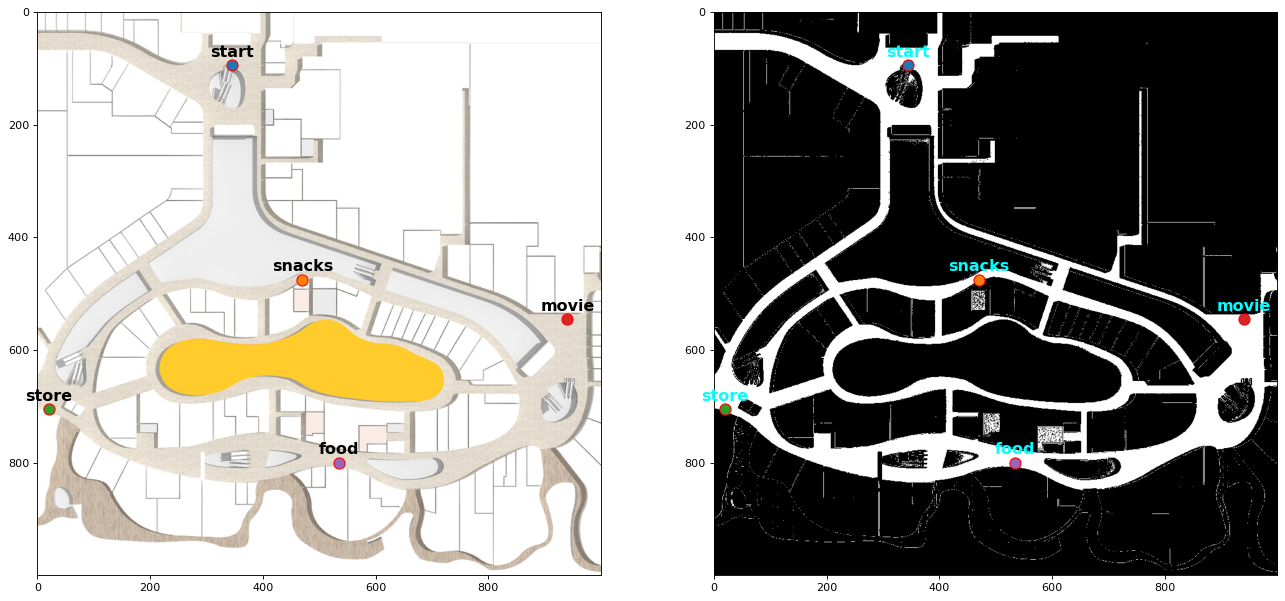

Cell start is free: True
Cell snacks is free: True
Cell store is free: True
Cell movie is free: True
Cell food is free: True


In [4]:
# Load the map
floor_plan = imageio.imread('./map/vivocity.png')
grid_map_img = imageio.imread('./map/vivocity_freespace.png')
grid_map = grid_map_img.transpose()
print("Size of the map:", grid_map.shape)
print("Occupied Cells:", np.count_nonzero(grid_map == 0))
print("Free Cells:", np.count_nonzero(grid_map == 255))

# Map resolution (Constant)
MAP_RES = 0.2 # each cell represents a 0.2m x 0.2m square in reality

# Locations on the map
locations = {'start':  [345, 95],    # Start from the level 2 Escalator
             'snacks': [470, 475],   # Garrett Popcorn
             'store':  [20, 705],    # DJI Store
             'movie':  [940, 545],   # Golden Village
             'food':   [535, 800],   # PUTIEN
            }

# A helper function to mark the locations on the map
def plot_locations(locations: dict, color: 'str'='black'):
    for key, value in locations.items():
        plt.plot(locations[key][0], locations[key][1], marker="o", markersize=10, markeredgecolor="red")
        plt.text(locations[key][0], locations[key][1]-15, s=key, fontsize='x-large', fontweight='bold', c=color, ha='center')
    return

# Plot the locaitons on the map 
plt.figure(figsize=(20, 10), dpi=80)
plt.subplot(1,2,1)
plt.imshow(floor_plan)
plot_locations(locations)
plt.subplot(1,2,2)
plt.imshow(grid_map_img, cmap='gray')
plot_locations(locations, color='cyan')
plt.show()

# Check if the designated locations are free
for key, value in locations.items():
    print(f"Cell {key} is free: {grid_map[value[0], value[1]] == 255}")

## Task 1

A* Algorithm using 'euclidean' heuristic
Total travelled distance: 224.178 m
Number of cells in planned path: 987
Number of visited cells: 65602
Run time: 0.498030 seconds


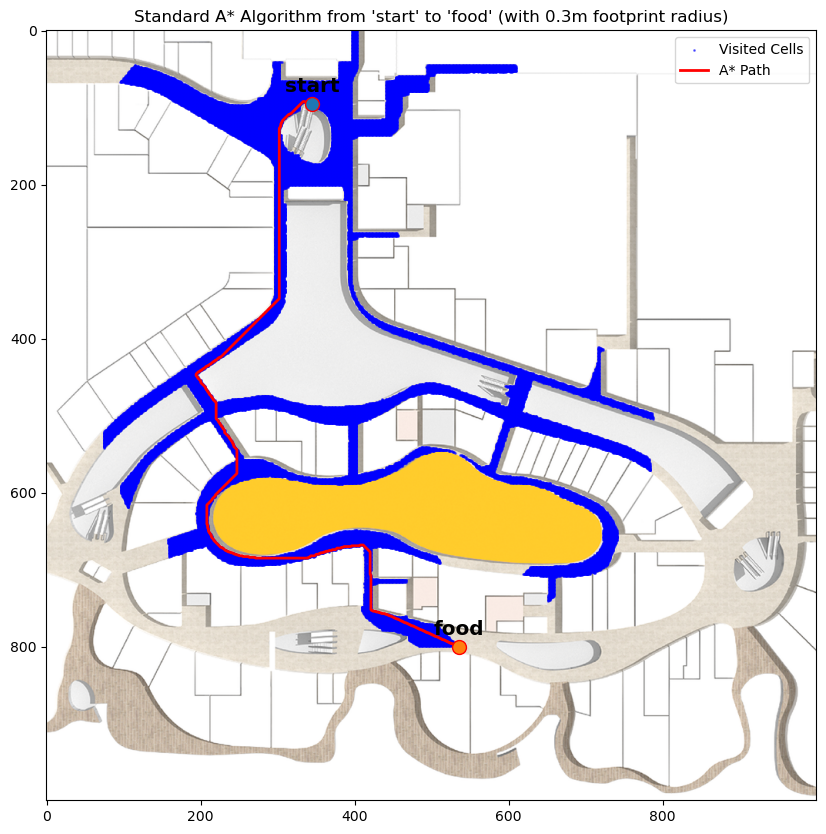


[A*] Calculating distances between each location, please wait...

[A*] Distance table between locations (unit: m):
	start	snacks	store	movie	food
start	0.000	143.852	155.396	180.208	224.178
snacks	143.852	0.000	115.350	107.382	140.124
store	155.396	115.350	0.000	209.574	110.954
movie	180.208	107.382	209.574	0.000	113.592
food	224.178	140.124	110.954	113.592	0.000

[A*] Optimal circuit route (TSP):
start -> snacks -> movie -> food -> store -> start
Total distance: 631.176 m

 [A*] Detailed information for each segment:
Segment start -> snacks: Number of cells in planned path: 644, Number of visited cells: 29956, Run time: 0.227638 s
Segment snacks -> movie: Number of cells in planned path: 476, Number of visited cells: 9566, Run time: 0.061047 s
Segment movie -> food: Number of cells in planned path: 505, Number of visited cells: 24862, Run time: 0.209507 s
Segment food -> store: Number of cells in planned path: 516, Number of visited cells: 17855, Run time: 0.107031 s
Segment store ->

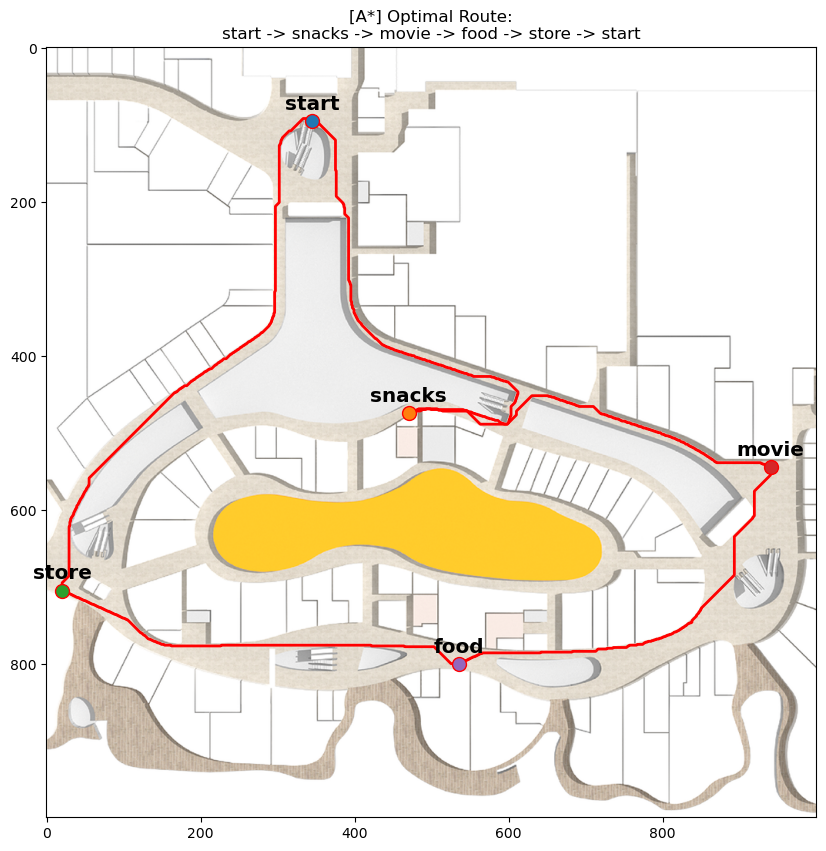


[Using Greedy Best First Search] Calculating distances between locations, please wait...

[Using Greedy Best First Search] Distance table between locations (unit: m):
	start	snacks	store	movie	food
start	0.000	145.236	166.042	182.930	237.110
snacks	158.176	0.000	123.784	126.342	141.928
store	171.368	119.076	0.000	263.092	124.478
movie	184.708	107.736	239.228	0.000	204.504
food	242.504	171.562	123.548	117.468	0.000

[Using Greedy Best First Search] Optimal circuit route (TSP):
start -> store -> food -> movie -> snacks -> start
Total distance: 673.900 m

[Using Greedy Best First Search] Detailed information for each segment:
Segment start -> store: Number of cells in planned path: 675, Number of visited cells: 691, Run time: 0.007716 s
Segment store -> food: Number of cells in planned path: 550, Number of visited cells: 573, Run time: 0.003939 s
Segment food -> movie: Number of cells in planned path: 517, Number of visited cells: 617, Run time: 0.004557 s
Segment movie -> snacks: Number

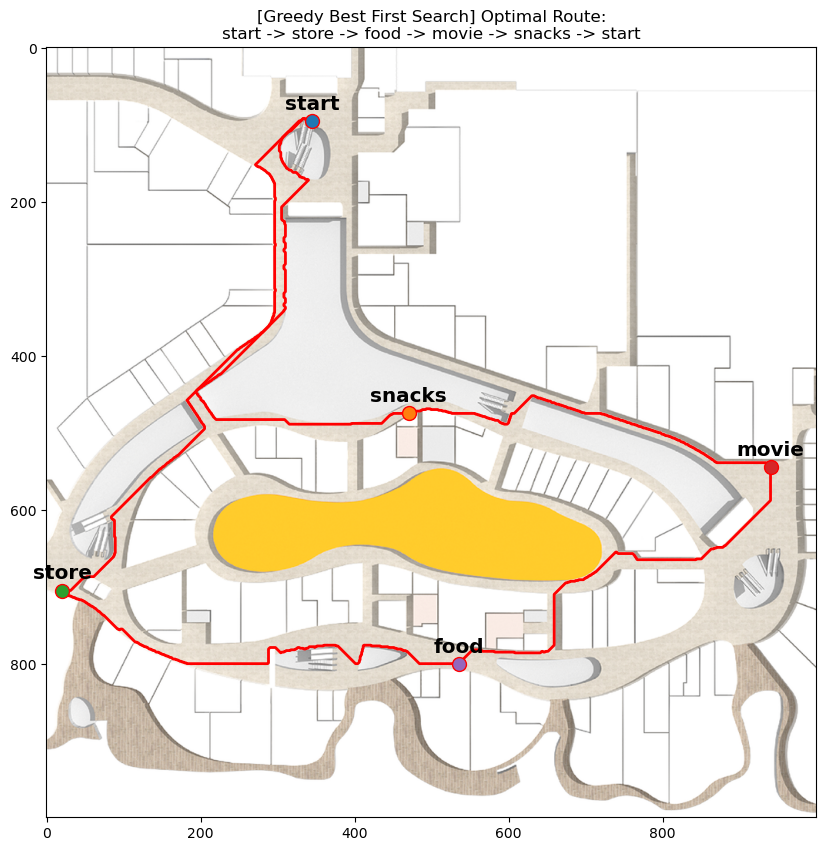


[Using Dijkstra algorithm] Calculating distances between locations, please wait...

[Using Dijkstra algorithm] Distance table between locations (unit: m):
	start	snacks	store	movie	food
start	0.000	143.852	155.396	180.208	224.178
snacks	143.852	0.000	115.350	107.382	140.124
store	155.396	115.350	0.000	209.574	110.954
movie	180.208	107.382	209.574	0.000	113.592
food	224.178	140.124	110.954	113.592	0.000

[Using Dijkstra algorithm] Optimal circuit route (TSP):
start -> snacks -> movie -> food -> store -> start
Total distance: 631.176 m

[Using Dijkstra algorithm] Detailed information for each segment:
Segment start -> snacks: Number of cells in planned path: 644, Number of visited cells: 58866, Run time: 0.291670 s
Segment snacks -> movie: Number of cells in planned path: 476, Number of visited cells: 51587, Run time: 0.219473 s
Segment movie -> food: Number of cells in planned path: 505, Number of visited cells: 49203, Run time: 0.230577 s
Segment food -> store: Number of cells in plan

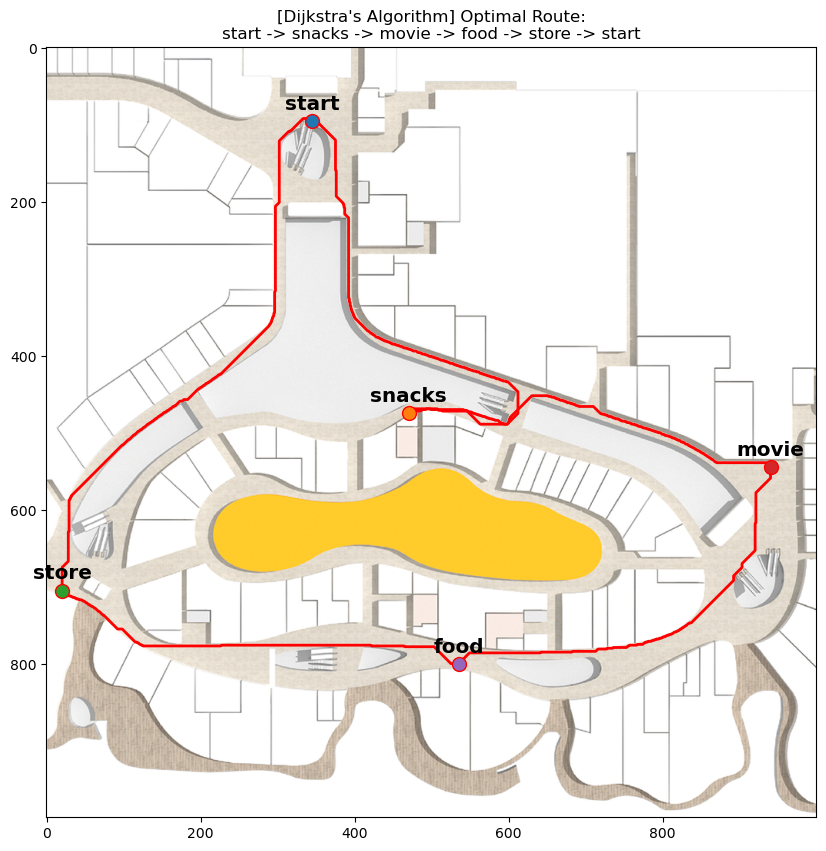

In [5]:
import heapq
import time
from math import ceil, sqrt
import numpy as np
from scipy.ndimage import binary_dilation
import matplotlib.pyplot as plt
from itertools import permutations

# ---------------------------
# Define global heuristic algorithm type variable
# Options: 'manhattan', 'euclidean', 'chebyshev', 'custom'
# ---------------------------
heuristic_choice = 'euclidean'

# ---------------------------
# Obstacle inflation processing
# ---------------------------
radius = 0.3          # Unit: m
cell_size = MAP_RES   # 0.2 m
radius_cells = radius / cell_size  # 0.3/0.2 = 1.5 grid cells

# Create circular structuring element (kernel)
kernel_size = 2 * ceil(radius_cells) + 1  # If ceil(1.5)=2, then kernel_size = 5
struct_elem = np.zeros((kernel_size, kernel_size), dtype=bool)
center = ceil(radius_cells)
for i in range(kernel_size):
    for j in range(kernel_size):
        if sqrt((i - center)**2 + (j - center)**2) * cell_size <= radius:
            struct_elem[i, j] = True

obstacle_mask = (grid_map != 255)
inflated_obstacle_mask = binary_dilation(obstacle_mask, structure=struct_elem)
inflated_grid = np.where(inflated_obstacle_mask, 0, 255)

# ---------------------------
# Heuristic function used in A* algorithm
# ---------------------------
def heuristic(a, b, heuristic_type=heuristic_choice):
    dx = abs(a[0] - b[0])
    dy = abs(a[1] - b[1])
    if heuristic_type == 'manhattan':
        return 0.2 * (dx + dy)
    elif heuristic_type == 'euclidean':
        return 0.2 * sqrt(dx**2 + dy**2)
    elif heuristic_type == 'custom':
        return 0.5 * (0.2 * (dx + dy)) + 0.5 * (0.2 * sqrt(dx**2 + dy**2))
    elif heuristic_type == 'chebyshev':
        # Chebyshev heuristic: Diagonal move cost is D2, horizontal/vertical move cost is D
        D = 0.2
        D2 = 0.282
        return D2 * min(dx, dy) + D * (max(dx, dy) - min(dx, dy))

# ---------------------------
# A* algorithm implementation (with obstacle inflation)
# ---------------------------
def astar(grid, start, goal, heuristic_type=heuristic_choice):
    start = tuple(start)
    goal = tuple(goal)
    rows, cols = grid.shape

    open_list = []
    heapq.heappush(open_list, (0, start))
    came_from = {}
    cost_so_far = {start: 0}
    visited = set()

    start_time = time.time()
    
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1),
                  (-1, -1), (-1, 1), (1, -1), (1, 1)]
    
    while open_list:
        current_f, current = heapq.heappop(open_list)
        visited.add(current)
        
        if current == goal:
            break

        for dx, dy in directions:
            neighbor = (current[0] + dx, current[1] + dy)
            if 0 <= neighbor[0] < rows and 0 <= neighbor[1] < cols:
                if grid[neighbor[0], neighbor[1]] != 255:
                    continue
                move_cost = 0.282 if (dx != 0 and dy != 0) else 0.2
                new_cost = cost_so_far[current] + move_cost
                if neighbor not in cost_so_far or new_cost < cost_so_far[neighbor]:
                    cost_so_far[neighbor] = new_cost
                    priority = new_cost + heuristic(neighbor, goal, heuristic_type)
                    heapq.heappush(open_list, (priority, neighbor))
                    came_from[neighbor] = current

    runtime = time.time() - start_time

    path = []
    if goal in came_from or start == goal:
        current = goal
        path.append(current)
        while current != start:
            current = came_from[current]
            path.append(current)
        path.reverse()
    
    return path, cost_so_far.get(goal, float('inf')), visited, runtime

# ================================================
# Function 1: Visualize the optimal path between two points and the grid cells visited during the search (A* algorithm)
# ================================================
start_name = "start"    # Example starting point, modify as needed
goal_name  = "food"     # Example target point

if start_name not in locations or goal_name not in locations:
    print("Unable to find the specified locations. Please check if start_name and goal_name exist in the locations dictionary.")
else:
    start_loc = locations[start_name]
    goal_loc = locations[goal_name]

    # Execute A* path planning (using the inflated map: inflated_grid)
    path, total_cost, visited_nodes, runtime = astar(inflated_grid, start_loc, goal_loc, heuristic_choice)

    # Output planning results
    print("A* Algorithm using '{}' heuristic".format(heuristic_choice))
    print("Total travelled distance: {:.3f} m".format(total_cost))
    print("Number of cells in planned path:", len(path))
    print("Number of visited cells:", len(visited_nodes))
    print("Run time: {:.6f} seconds".format(runtime))

    # Plot planning results
    plt.figure(figsize=(10,10))
    plt.imshow(floor_plan)
    # Plot all visited nodes (blue dots)
    visited_x = [cell[0] for cell in visited_nodes]
    visited_y = [cell[1] for cell in visited_nodes]
    plt.scatter(visited_x, visited_y, s=1, c='blue', alpha=0.5, label='Visited Cells')
    # Plot the planned path (red line)
    path_x = [p[0] for p in path]
    path_y = [p[1] for p in path]
    plt.plot(path_x, path_y, color='red', linewidth=2, label='A* Path')
    # Mark key locations (start and goal)
    plot_locations({start_name: start_loc, goal_name: goal_loc})
    plt.title("Standard A* Algorithm from '{}' to '{}' (with 0.3m footprint radius)".format(start_name, goal_name))
    plt.legend()
    plt.show()

# =============================================================================
# Function 2: Compute the distance table among all specified locations and record detailed information for each segment (A* algorithm)
# =============================================================================
# Specified locations: start, snacks, store, movie, food
points = ["start", "snacks", "store", "movie", "food"]

# Initialize dictionaries for distances, paths, and additional segment details (path, visited nodes, runtime)
distance_matrix = {}
path_matrix = {}
segment_info = {}
print("\n[A*] Calculating distances between each location, please wait...")
for p in points:
    distance_matrix[p] = {}
    path_matrix[p] = {}
    segment_info[p] = {}
    for q in points:
        if p == q:
            distance_matrix[p][q] = 0.0
            path_matrix[p][q] = [locations[p]]
            segment_info[p][q] = ([locations[p]], 0.0, set([tuple(locations[p])]), 0.0)
        else:
            p_loc = locations[p]
            q_loc = locations[q]
            seg_path, seg_cost, seg_visited, seg_runtime = astar(inflated_grid, p_loc, q_loc, heuristic_choice)
            distance_matrix[p][q] = seg_cost
            path_matrix[p][q] = seg_path
            segment_info[p][q] = (seg_path, seg_cost, seg_visited, seg_runtime)

# Output the distance table in the terminal
print("\n[A*] Distance table between locations (unit: m):")
header = "\t" + "\t".join(points)
print(header)
for p in points:
    row = [p]
    for q in points:
        cost = distance_matrix[p][q]
        if cost == float('inf'):
            row.append("inf")
        else:
            row.append("{:.3f}".format(cost))
    print("\t".join(row))

# =============================================================================
# Function 3: Solve the TSP for the shortest circuit route, plot the route on the map, and output detailed segment information (A* algorithm)
# =============================================================================
# Fixed starting point "start", and compute the shortest circuit route by permuting the order of other locations (start, snacks, store, movie, food, and then return to start)
other_points = [p for p in points if p != "start"]
best_route = None
best_cost = float('inf')

for perm in permutations(other_points):
    route = ["start"] + list(perm) + ["start"]
    route_cost = 0.0
    valid = True
    for i in range(len(route) - 1):
        seg_cost = distance_matrix[route[i]][route[i+1]]
        if seg_cost == float('inf'):
            valid = False
            break
        route_cost += seg_cost
    if valid and route_cost < best_cost:
        best_cost = route_cost
        best_route = route

if best_route is None:
    print("Unable to find a valid route that visits all locations!")
else:
    print("\n[A*] Optimal circuit route (TSP):")
    print(" -> ".join(best_route))
    print("Total distance: {:.3f} m".format(best_cost))
    
    # Collect and output detailed information for each segment
    total_cells = 0
    total_visited = 0
    total_runtime = 0.0
    print("\n [A*] Detailed information for each segment:")
    for i in range(len(best_route) - 1):
         seg_info = segment_info[best_route[i]][best_route[i+1]]
         seg_path, seg_cost, seg_visited, seg_runtime = seg_info
         seg_cells = len(seg_path)
         seg_visited_count = len(seg_visited)
         total_cells += seg_cells
         total_visited += seg_visited_count
         total_runtime += seg_runtime
         print("Segment {} -> {}: Number of cells in planned path: {}, Number of visited cells: {}, Run time: {:.6f} s".format(
               best_route[i], best_route[i+1], seg_cells, seg_visited_count, seg_runtime))
    
    print("\n[A*] Summary:")
    print("Total number of planned path cells (sum of segments):", total_cells)
    print("Total number of visited cells (sum of segments):", total_visited)
    print("Total run time: {:.6f} s".format(total_runtime))

    # Plot the TSP route
    plt.figure(figsize=(10,10))
    plt.imshow(floor_plan)
    # Plot each segment of the route on the map
    for i in range(len(best_route)-1):
        seg_path = path_matrix[best_route[i]][best_route[i+1]]
        if seg_path is None or len(seg_path) == 0:
            continue
        seg_x = [p[0] for p in seg_path]
        seg_y = [p[1] for p in seg_path]
        plt.plot(seg_x, seg_y, 'r-', linewidth=2)
    # Mark all key locations on the map
    plot_locations({p: locations[p] for p in points})
    plt.title("[A*] Optimal Route:\n" + " -> ".join(best_route))
    plt.show()

# =============================================================================
# Function 4: Use GBFS to compute the distance table between specified locations, while recording segment information
# =============================================================================

def greedy_best_first_search(grid, start, goal, heuristic_type=heuristic_choice):
    """
    Use Greedy Best First Search to find a path from start to goal on grid.
    Compared to A*, GBFS's priority is based solely on the heuristic, without considering the accumulated cost.
    
    grid           : Map (numpy array), where 255 represents passable cells and 0 represents obstacles.
    start, goal    : Coordinates in (row, col) format for the start and goal.
    heuristic_type : Heuristic type, same as in A* ('manhattan', 'euclidean', 'diagonal', 'custom')
    
    return: (path, total_cost, visited, runtime)
        - path        : List of grid coordinates from start to goal.
        - total_cost  : Movement cost of the path (based on 0.2 / 0.282).
        - visited     : Set of grid nodes visited during the search.
        - runtime     : Time taken for the search (seconds).
    """
    import heapq
    import time
    
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1),
                  (-1, -1), (-1, 1), (1, -1), (1, 1)]
    
    def heuristic(a, b, heuristic_type=heuristic_choice):
        dx = abs(a[0] - b[0])
        dy = abs(a[1] - b[1])
        if heuristic_type == 'manhattan':
            return 0.2 * (dx + dy)
        elif heuristic_type == 'euclidean':
            return 0.2 * sqrt(dx**2 + dy**2)
        elif heuristic_type == 'custom':
            return 0.5 * (0.2 * (dx + dy)) + 0.5 * (0.2 * sqrt(dx**2 + dy**2))
        else:  # corresponding to 'diagonal'
            D = 0.2
            D2 = 0.282
            return D * (dx + dy) + (D2 - 2 * D) * min(dx, dy)

    start_t = time.time()
    
    start = tuple(start)
    goal = tuple(goal)
    rows, cols = grid.shape

    open_list = []
    # GBFS priority = heuristic(current, goal)
    heapq.heappush(open_list, (heuristic(start, goal, heuristic_type), start))

    came_from = {}
    cost_so_far = {start: 0}  # Not used in priority, but recorded for path backtracking and cost statistics
    visited = set()

    while open_list:
        current_priority, current = heapq.heappop(open_list)
        visited.add(current)

        if current == goal:
            break
        
        for dx, dy in directions:
            neighbor = (current[0] + dx, current[1] + dy)
            if 0 <= neighbor[0] < rows and 0 <= neighbor[1] < cols:
                if grid[neighbor[0], neighbor[1]] != 255:
                    continue
                move_cost = 0.282 if (dx != 0 and dy != 0) else 0.2
                new_cost = cost_so_far[current] + move_cost
                if neighbor not in cost_so_far or new_cost < cost_so_far[neighbor]:
                    cost_so_far[neighbor] = new_cost
                    priority = heuristic(neighbor, goal, heuristic_type)
                    heapq.heappush(open_list, (priority, neighbor))
                    came_from[neighbor] = current

    runtime = time.time() - start_t

    # Backtrack the path
    path = []
    if goal in came_from or start == goal:
        cur = goal
        path.append(cur)
        while cur != start:
            cur = came_from[cur]
            path.append(cur)
        path.reverse()

    total_cost = cost_so_far.get(goal, float('inf'))
    return path, total_cost, visited, runtime



points_gbfs = ["start", "snacks", "store", "movie", "food"]

distance_matrix_g = {}
path_matrix_g = {}
segment_info_g = {}

print("\n[Using Greedy Best First Search] Calculating distances between locations, please wait...")

for p in points_gbfs:
    distance_matrix_g[p] = {}
    path_matrix_g[p] = {}
    segment_info_g[p] = {}
    for q in points_gbfs:
        if p == q:
            distance_matrix_g[p][q] = 0.0
            path_matrix_g[p][q] = [locations[p]]
            segment_info_g[p][q] = ([locations[p]], 0.0, set([tuple(locations[p])]), 0.0)
        else:
            p_loc = locations[p]
            q_loc = locations[q]
            seg_path, seg_cost, seg_visited, seg_runtime = greedy_best_first_search(inflated_grid, p_loc, q_loc, heuristic_choice)
            distance_matrix_g[p][q] = seg_cost
            path_matrix_g[p][q] = seg_path
            segment_info_g[p][q] = (seg_path, seg_cost, seg_visited, seg_runtime)

# Output the distance table in the terminal for GBFS
print("\n[Using Greedy Best First Search] Distance table between locations (unit: m):")
header_g = "\t" + "\t".join(points_gbfs)
print(header_g)
for p in points_gbfs:
    row = [p]
    for q in points_gbfs:
        cost = distance_matrix_g[p][q]
        if cost == float('inf'):
            row.append("inf")
        else:
            row.append("{:.3f}".format(cost))
    print("\t".join(row))


# =============================================================================
# Function 5: Use GBFS to solve the TSP for the shortest circuit route, plot the route, and output detailed information
# =============================================================================

other_points_g = [p for p in points_gbfs if p != "start"]
best_route_g = None
best_cost_g = float('inf')

for perm in permutations(other_points_g):
    route = ["start"] + list(perm) + ["start"]
    route_cost = 0.0
    valid = True
    for i in range(len(route) - 1):
        seg_cost = distance_matrix_g[route[i]][route[i+1]]
        if seg_cost == float('inf'):
            valid = False
            break
        route_cost += seg_cost
    if valid and route_cost < best_cost_g:
        best_cost_g = route_cost
        best_route_g = route

if best_route_g is None:
    print("\n[Using Greedy Best First Search] Unable to find a valid route that visits all locations!")
else:
    print("\n[Using Greedy Best First Search] Optimal circuit route (TSP):")
    print(" -> ".join(best_route_g))
    print("Total distance: {:.3f} m".format(best_cost_g))
    
    # Collect and output detailed information for each segment
    total_cells_g = 0
    total_visited_g = 0
    total_runtime_g = 0.0
    print("\n[Using Greedy Best First Search] Detailed information for each segment:")
    for i in range(len(best_route_g) - 1):
        seg_info = segment_info_g[best_route_g[i]][best_route_g[i+1]]
        seg_path, seg_cost, seg_visited, seg_runtime = seg_info
        seg_cells = len(seg_path)
        seg_visited_count = len(seg_visited)
        total_cells_g += seg_cells
        total_visited_g += seg_visited_count
        total_runtime_g += seg_runtime
        print("Segment {} -> {}: Number of cells in planned path: {}, Number of visited cells: {}, Run time: {:.6f} s"
              .format(best_route_g[i], best_route_g[i+1], seg_cells, seg_visited_count, seg_runtime))
    
    print("\n[Using Greedy Best First Search] Summary:")
    print("Total number of planned path cells (sum of segments):", total_cells_g)
    print("Total number of visited cells (sum of segments):", total_visited_g)
    print("Total run time: {:.6f} s".format(total_runtime_g))

    # Plot the TSP route for GBFS
    plt.figure(figsize=(10,10))
    plt.imshow(floor_plan)
    for i in range(len(best_route_g)-1):
        seg_path = path_matrix_g[best_route_g[i]][best_route_g[i+1]]
        if seg_path is None or len(seg_path) == 0:
            continue
        seg_x = [p[0] for p in seg_path]
        seg_y = [p[1] for p in seg_path]
        plt.plot(seg_x, seg_y, 'r-', linewidth=2)

    plot_locations({p: locations[p] for p in points_gbfs})
    plt.title("[Greedy Best First Search] Optimal Route:\n" + " -> ".join(best_route_g))
    plt.show()

# =============================================================================
# Function 6: Use Dijkstra algorithm to compute the distance table between specified locations, while recording segment information
# =============================================================================
def dijkstra_search(grid, start, goal):
    """
    Use Dijkstra algorithm to find a path from start to goal on grid.
    The difference with A* is that Dijkstra does not use a heuristic, only considering the accumulated cost.
    
    Parameters:
        grid  : Map (numpy array), where 255 represents passable cells and 0 represents obstacles.
        start : Starting coordinate in (row, col) format.
        goal  : Goal coordinate in (row, col) format.
        
    Returns:
        path      : List of grid coordinates from start to goal.
        total_cost: Movement cost of the path (based on 0.2 / 0.282).
        visited   : Set of grid nodes visited during the search.
        runtime   : Time taken for the search (seconds).
    """
    import heapq
    import time
    start_t = time.time()
    
    start = tuple(start)
    goal = tuple(goal)
    rows, cols = grid.shape

    open_list = []
    heapq.heappush(open_list, (0, start))
    came_from = {}
    cost_so_far = {start: 0}
    visited = set()

    directions = [(-1, 0), (1, 0), (0, -1), (0, 1),
                  (-1, -1), (-1, 1), (1, -1), (1, 1)]
    
    while open_list:
        current_cost, current = heapq.heappop(open_list)
        visited.add(current)
        
        if current == goal:
            break
        
        for dx, dy in directions:
            neighbor = (current[0] + dx, current[1] + dy)
            if 0 <= neighbor[0] < rows and 0 <= neighbor[1] < cols:
                if grid[neighbor[0], neighbor[1]] != 255:
                    continue
                move_cost = 0.282 if (dx != 0 and dy != 0) else 0.2
                new_cost = cost_so_far[current] + move_cost
                if neighbor not in cost_so_far or new_cost < cost_so_far[neighbor]:
                    cost_so_far[neighbor] = new_cost
                    heapq.heappush(open_list, (new_cost, neighbor))
                    came_from[neighbor] = current

    runtime = time.time() - start_t

    # Backtrack the path
    path = []
    if goal in came_from or start == goal:
        cur = goal
        path.append(cur)
        while cur != start:
            cur = came_from[cur]
            path.append(cur)
        path.reverse()
        
    return path, cost_so_far.get(goal, float('inf')), visited, runtime

# =============================================================================
# Use Dijkstra algorithm to compute the distance table between specified locations
# =============================================================================
points_dijkstra = ["start", "snacks", "store", "movie", "food"]

distance_matrix_d = {}
path_matrix_d = {}
segment_info_d = {}
print("\n[Using Dijkstra algorithm] Calculating distances between locations, please wait...")
for p in points_dijkstra:
    distance_matrix_d[p] = {}
    path_matrix_d[p] = {}
    segment_info_d[p] = {}
    for q in points_dijkstra:
        if p == q:
            distance_matrix_d[p][q] = 0.0
            path_matrix_d[p][q] = [locations[p]]
            segment_info_d[p][q] = ([locations[p]], 0.0, set([tuple(locations[p])]), 0.0)
        else:
            p_loc = locations[p]
            q_loc = locations[q]
            seg_path, seg_cost, seg_visited, seg_runtime = dijkstra_search(inflated_grid, p_loc, q_loc)
            distance_matrix_d[p][q] = seg_cost
            path_matrix_d[p][q] = seg_path
            segment_info_d[p][q] = (seg_path, seg_cost, seg_visited, seg_runtime)

print("\n[Using Dijkstra algorithm] Distance table between locations (unit: m):")
header_d = "\t" + "\t".join(points_dijkstra)
print(header_d)
for p in points_dijkstra:
    row = [p]
    for q in points_dijkstra:
        cost = distance_matrix_d[p][q]
        if cost == float('inf'):
            row.append("inf")
        else:
            row.append("{:.3f}".format(cost))
    print("\t".join(row))

# =============================================================================
# Function 7: Use Dijkstra algorithm to solve the TSP for the shortest circuit route, plot the route, and output detailed information
# =============================================================================
other_points_d = [p for p in points_dijkstra if p != "start"]
best_route_d = None
best_cost_d = float('inf')

from itertools import permutations
for perm in permutations(other_points_d):
    route = ["start"] + list(perm) + ["start"]
    route_cost = 0.0
    valid = True
    for i in range(len(route) - 1):
        seg_cost = distance_matrix_d[route[i]][route[i+1]]
        if seg_cost == float('inf'):
            valid = False
            break
        route_cost += seg_cost
    if valid and route_cost < best_cost_d:
        best_cost_d = route_cost
        best_route_d = route

if best_route_d is None:
    print("\n[Using Dijkstra algorithm] Unable to find a valid route that visits all locations!")
else:
    print("\n[Using Dijkstra algorithm] Optimal circuit route (TSP):")
    print(" -> ".join(best_route_d))
    print("Total distance: {:.3f} m".format(best_cost_d))
    
    total_cells_d = 0
    total_visited_d = 0
    total_runtime_d = 0.0
    print("\n[Using Dijkstra algorithm] Detailed information for each segment:")
    for i in range(len(best_route_d) - 1):
        seg_info = segment_info_d[best_route_d[i]][best_route_d[i+1]]
        seg_path, seg_cost, seg_visited, seg_runtime = seg_info
        seg_cells = len(seg_path)
        seg_visited_count = len(seg_visited)
        total_cells_d += seg_cells
        total_visited_d += seg_visited_count
        total_runtime_d += seg_runtime
        print("Segment {} -> {}: Number of cells in planned path: {}, Number of visited cells: {}, Run time: {:.6f} s".format(
            best_route_d[i], best_route_d[i+1], seg_cells, seg_visited_count, seg_runtime))
    
    print("\n[Using Dijkstra algorithm] Summary:")
    print("Total number of planned path cells (sum of segments):", total_cells_d)
    print("Total number of visited cells (sum of segments):", total_visited_d)
    print("Total run time: {:.6f} s".format(total_runtime_d))
    
    # Plot the TSP route
    plt.figure(figsize=(10,10))
    plt.imshow(floor_plan)
    for i in range(len(best_route_d)-1):
        seg_path = path_matrix_d[best_route_d[i]][best_route_d[i+1]]
        if seg_path is None or len(seg_path) == 0:
            continue
        seg_x = [p[0] for p in seg_path]
        seg_y = [p[1] for p in seg_path]
        plt.plot(seg_x, seg_y, 'r-', linewidth=2)
    plot_locations({p: locations[p] for p in points_dijkstra})
    plt.title("[Dijkstra's Algorithm] Optimal Route:\n" + " -> ".join(best_route_d))
    plt.show()


## Task 2

In [1]:
from itertools import permutations
from functools import lru_cache
import matplotlib.pyplot as plt

# Assume that distance_matrix, path_matrix, floor_plan, and locations are already defined.
start = "start"

def tsp_bruteforce(distance_matrix, start):
    others = [p for p in distance_matrix if p != start]
    best_route, best_cost = None, float('inf')
    for perm in permutations(others):
        route = [start] + list(perm) + [start]
        cost = sum(distance_matrix[route[i]][route[i+1]] for i in range(len(route)-1))
        if cost < best_cost:
            best_route, best_cost = route, cost
    return best_route, best_cost

def tsp_nearest_neighbor(distance_matrix, start):
    unvisited = set(distance_matrix.keys()) - {start}
    route = [start]
    cost = 0.0
    current = start
    while unvisited:
        nxt = min(unvisited, key=lambda x: distance_matrix[current][x])
        cost += distance_matrix[current][nxt]
        route.append(nxt)
        current = nxt
        unvisited.remove(nxt)
    route.append(start)
    cost += distance_matrix[current][start]
    return route, cost

def tsp_held_karp(distance_matrix, start):
    points = list(distance_matrix.keys())
    idx = {p: i for i, p in enumerate(points)}
    n = len(points)

    @lru_cache(None)
    def dp(curr_idx, visited_mask):
        if visited_mask == (1 << n) - 1:
            return distance_matrix[points[curr_idx]][start], [start]
        best_cost = float('inf')
        best_path = None
        for nxt_idx in range(n):
            if not (visited_mask >> nxt_idx) & 1:
                cost_to_nxt = distance_matrix[points[curr_idx]][points[nxt_idx]]
                total_cost, suffix = dp(nxt_idx, visited_mask | (1 << nxt_idx))
                total = cost_to_nxt + total_cost
                if total < best_cost:
                    best_cost = total
                    best_path = [points[nxt_idx]] + suffix
        return best_cost, best_path

    start_idx = idx[start]
    cost, suffix = dp(start_idx, 1 << start_idx)
    return [start] + suffix, cost

# Helper function: Plot locations with different colors (as in task1.py)
def plot_locations(loc_dict, route_nodes=None):
    # Define a list of distinct colors for locations
    color_list = ['red', 'green', 'blue', 'orange', 'purple', 'brown', 'pink', 'cyan']
    if route_nodes is None:
        keys = list(loc_dict.keys())
    else:
        keys = route_nodes
    for i, name in enumerate(keys):
        coord = loc_dict[name]
        color = color_list[i % len(color_list)]
        # Plot marker with a specific color
        plt.scatter(coord[0], coord[1], s=30, c=color, marker='o')
        plt.text(coord[0], coord[1], name, fontsize=12, color=color,
                 verticalalignment='bottom', horizontalalignment='right')

# Define the three TSP methods
tsp_methods = [
    ("Brute-Force", tsp_bruteforce),
    ("Nearest-Neighbor", tsp_nearest_neighbor),
    ("Held-Karp DP", tsp_held_karp)
]

# Solve TSP using each method, print results, and plot the TSP route using actual paths (thin red lines)
for method_name, func in tsp_methods:
    route, total = func(distance_matrix, start)
    print(f"[{method_name}] Path: {' -> '.join(route)} | Total Distance: {total:.3f} m")
    
    plt.figure(figsize=(8, 8))
    plt.imshow(floor_plan, cmap='gray')  # Display the map background
    
    # Draw each segment of the TSP route using the actual computed path from path_matrix
    for i in range(len(route) - 1):
        seg_path = path_matrix[route[i]][route[i+1]]
        if seg_path is None or len(seg_path) == 0:
            continue  # Skip if no valid path is available
        seg_x = [pt[0] for pt in seg_path]
        seg_y = [pt[1] for pt in seg_path]
        plt.plot(seg_x, seg_y, color='red', linestyle='-', linewidth=1)
    
    # Mark the locations along the TSP route with markers and labels using different colors
    plot_locations(locations, route_nodes=route)
    
    # Write the route in the graph title
    plt.title(f"Route - {method_name}: {' -> '.join(route)}")
    plt.show()


NameError: name 'distance_matrix' is not defined

## Task 3